## Project Overview

This project focuses on analyzing the Netflix Movies and TV Shows dataset to understand content trends on the platform.
The goal is to explore patterns related to content type, genres, release years, ratings, duration, and country-wise distribution
using Python-based data analysis techniques.


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Loading & Cleaning

The dataset is loaded using Pandas. Rows with missing values in critical columns such as
content type, release year, rating, country, and duration are removed to ensure reliable analysis.


In [21]:
df = pd.read_csv('netflix_titles.csv', engine="python")
df = df.dropna(subset=['type','release_year','rating','country','duration'])


## Distribution of Movies vs TV Shows

This analysis compares the number of movies and TV shows available on Netflix
to understand the platform’s overall content composition.


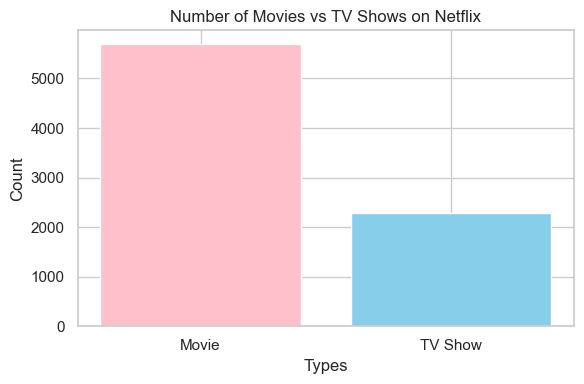

In [22]:
type_count = df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['pink','skyblue'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Types')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


## Content Rating Analysis

This section analyzes the distribution of content ratings on Netflix
to understand the maturity level and target audience of the available content.


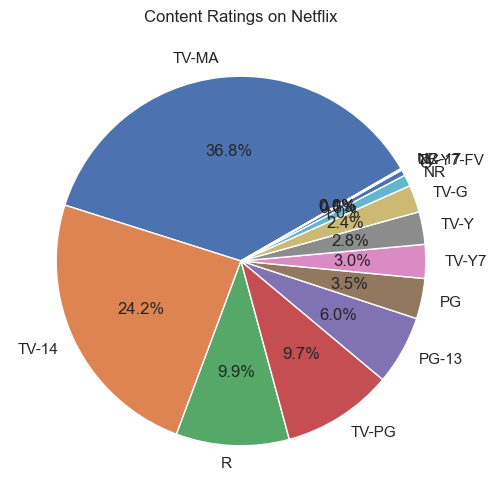

In [23]:
rating_count = df['rating'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=30)
plt.title('Content Ratings on Netflix')
plt.savefig('rating.png')
plt.show()


## Movie Duration Analysis

This analysis focuses on movie durations. Since the duration column is stored as text
(e.g., "90 min"), it is converted into numerical format to enable statistical analysis
and visualization.


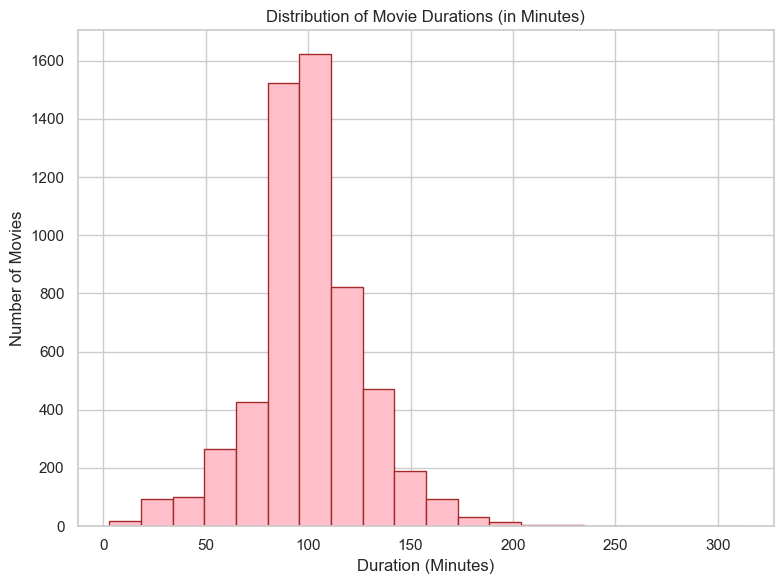

In [24]:
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=20, color='pink', edgecolor='brown')
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movies_duration.png')
plt.show()


## Content Release Trend Over the Years

This analysis explores how Netflix content production has evolved over time
by examining the number of titles released each year.


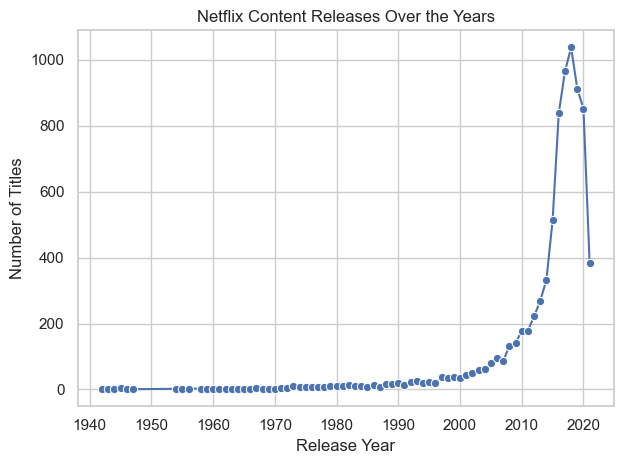

In [25]:
release_counts = df['release_year'].value_counts().sort_index()

sns.set_theme(style="whitegrid")
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')

plt.title('Netflix Content Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('release_trend.png', dpi=300)
plt.show()


## Top 10 Countries by Content Volume

This section identifies the top 10 countries contributing the highest number
of movies and TV shows on Netflix.


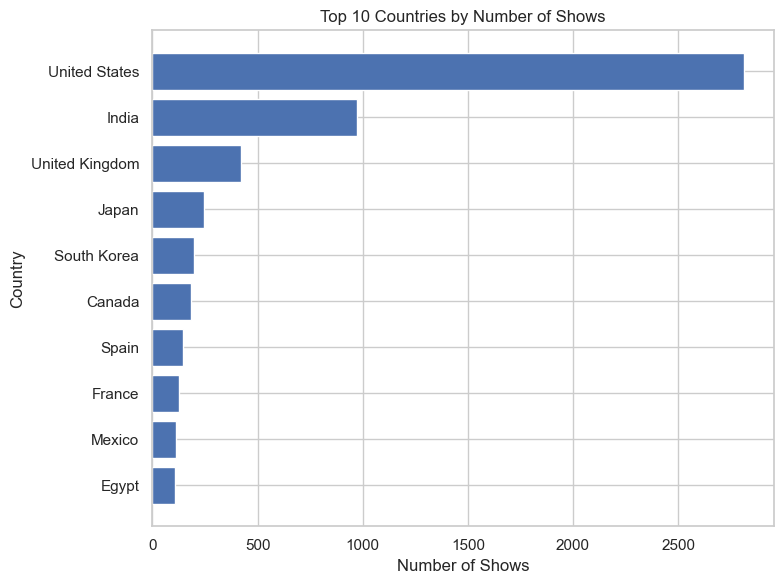

In [26]:
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.barh(country_counts.index[::-1], country_counts.values[::-1])
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()


## Comparison of Movies and TV Shows Released Over Time

This analysis compares the yearly release trends of movies and TV shows
to understand how Netflix’s content strategy has shifted over time.


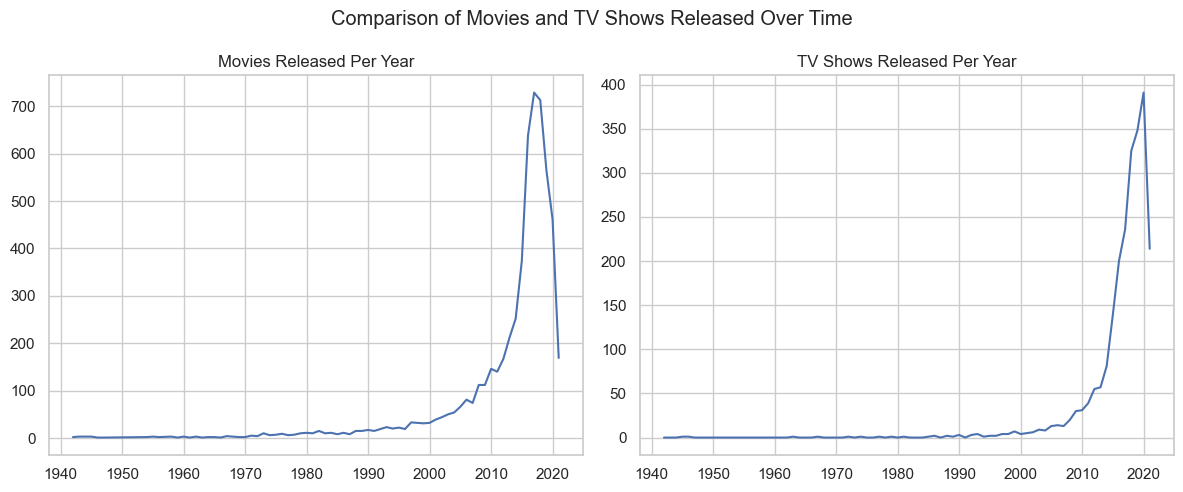

In [27]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(content_by_year.index, content_by_year['Movie'])
ax[0].set_title('Movies Released Per Year')

ax[1].plot(content_by_year.index, content_by_year['TV Show'])
ax[1].set_title('TV Shows Released Per Year')

fig.suptitle('Comparison of Movies and TV Shows Released Over Time')
plt.tight_layout()
plt.savefig('movies_Tv_shows.png')
plt.show()


## Time Gap Between Content Release and Availability on Netflix

This analysis examines the gap between a title’s original release year
and the year it was added to Netflix, providing insight into Netflix’s
content acquisition strategy.


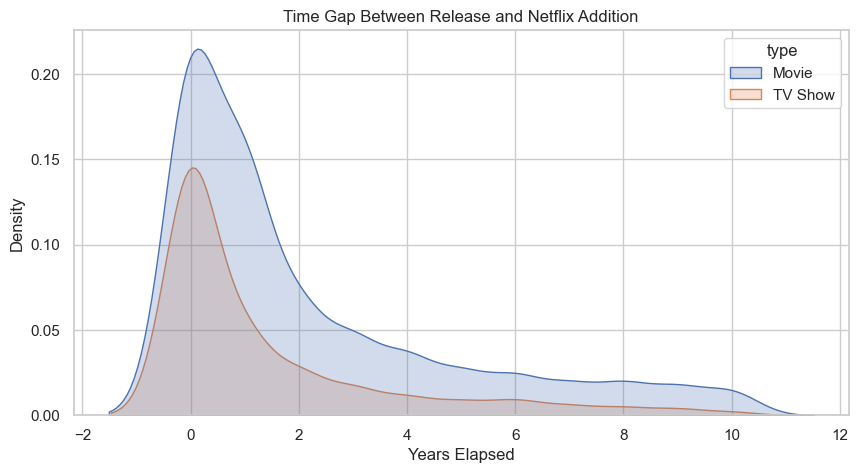

In [28]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['year_added'] = df['date_added'].dt.year
df['year_gap'] = df['year_added'] - df['release_year']

recent_gap = df[df['year_gap'].between(0, 10)]

plt.figure(figsize=(10, 5))
sns.kdeplot(data=recent_gap, x='year_gap', hue='type', fill=True)
plt.title('Time Gap Between Release and Netflix Addition')
plt.xlabel('Years Elapsed')
plt.ylabel('Density')
plt.savefig('timegap.png')
plt.show()


## Insights & Conclusion

- Netflix has a higher number of movies compared to TV shows, but TV shows have shown steady growth over time.
- Most content falls under mature ratings, indicating a focus on adult audiences.
- Movie durations are generally concentrated between 80–120 minutes.
- The United States and India are the top content-producing countries.
- A significant amount of content is added to Netflix within a few years of its original release.

Conclusion:
This analysis highlights Netflix’s evolving content strategy, increasing focus on TV shows,
and strong dependence on specific regions. These insights can support data-driven decisions
related to content acquisition and platform growth.
